# Hackathon : Reinforcement Learning for Drone Navigation

- Team name:
- Team members names:

## 0. Prerequisites

In [1]:
%load_ext autoreload
%autoreload 2

import env
import agent
import reward
import simulate

## 1. Training

In [2]:
trained_agent, all_rewards = simulate.train('config.json')

Episode 1, Step 87, Reward: -14820.00, Evacuated: 0, Deactivated: 3
Pygame window closed

Simulation interrupted by the user


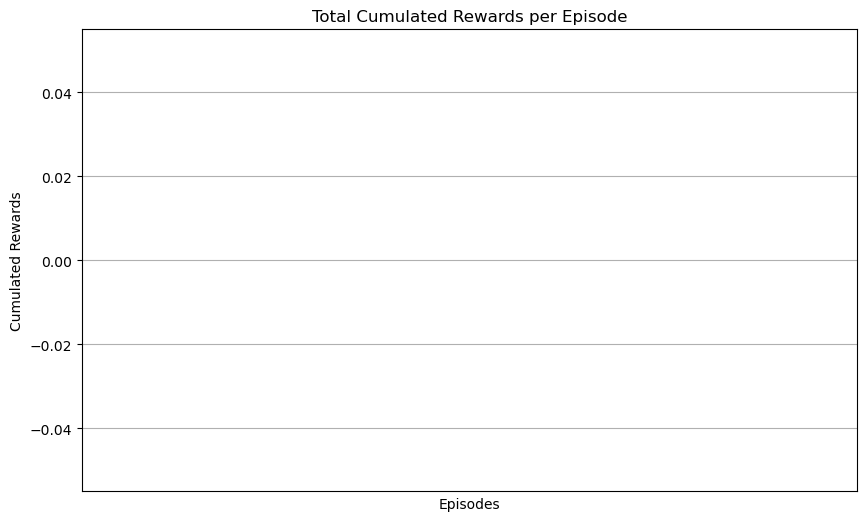

In [3]:
# Plot the cumulated rewards per episode
simulate.plot_cumulated_rewards(all_rewards)

## 2. Evaluation

In [4]:
eval_config_paths = [f"./eval_configs/config_{i}.json" for i in range(1, 11)]

In [5]:
all_results = simulate.evaluate(eval_config_paths, trained_agent)


--- Evaluating Configuration: ./eval_configs/config_1.json ---


FileNotFoundError: [Errno 2] No such file or directory: './eval_configs/config_1.json'

In [ ]:
display(all_results)

In [ ]:
# Calculate averages for each configuration
averages = all_results.groupby('config_path').mean().reset_index().drop(columns=['episode'])
averages = averages.rename(columns={
    'steps': 'avg_steps',
    'reward': 'avg_reward',
    'evacuated': 'avg_evacuated',
    'deactivated': 'avg_deactivated'})

display(averages)
averages.to_csv('averages.csv', index=False)